# AFTER FEATURE ENGINEERING

In [1]:
#Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from xgboost import XGBRegressor
from xgboost import XGBRFRegressor


from sklearn import metrics, model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# from sklearn.preprocessing import Imputer


from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [20]:
xlsx = pd.ExcelFile('DATA.xlsx')
df = pd.read_excel(xlsx, 'Sheet1')
dataset= df.copy()
dataset

,pH,Temp,Adsorbent,Ct_time,eff
0,9,328,40,50,98.92
1,7,318,30,20,98.72
2,7,318,50,40,99.78
3,5,308,20,30,80.74
4,7,318,30,40,99.11
5,9,308,40,30,97.99
6,11,318,30,40,99.88
7,5,308,40,50,97.15
8,9,308,20,50,97.52
9,5,328,40,30,71.08


In [21]:
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
Sd_scaler1 =scaler1.fit(dataset)
data1_Sd= Sd_scaler1.transform(dataset)
print(data1_Sd)
    
    #convert to dataframe
dataset= pd.DataFrame(data1_Sd, columns=dataset.keys())

[[ 1.08012345e+00  1.08012345e+00  1.08012345e+00  1.09688074e+00
   7.65556425e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.08029105e+00
   7.40360328e-01]
 [ 0.00000000e+00  0.00000000e+00  2.16024690e+00  3.78234737e-02
   8.73899644e-01]
 [-1.08012345e+00 -1.08012345e+00 -1.08012345e+00 -1.02123379e+00
  -1.52476883e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  3.78234737e-02
   7.89492718e-01]
 [ 1.08012345e+00 -1.08012345e+00  1.08012345e+00 -1.02123379e+00
   6.48394572e-01]
 [ 2.16024690e+00  0.00000000e+00  0.00000000e+00  3.78234737e-02
   8.86497693e-01]
 [-1.08012345e+00 -1.08012345e+00  1.08012345e+00  1.09688074e+00
   5.42570963e-01]
 [ 1.08012345e+00 -1.08012345e+00 -1.08012345e+00  1.09688074e+00
   5.89183743e-01]
 [-1.08012345e+00  1.08012345e+00  1.08012345e+00 -1.02123379e+00
  -2.74174034e+00]
 [-1.08012345e+00  1.08012345e+00 -1.08012345e+00 -1.02123379e+00
  -7.86523178e-01]
 [ 0.00000000e+00 -2.16024690e+00  0.00000000e+00  3.78234737e-02

In [ ]:
#scalling II, Minmax
from sklearn.preprocessing import MinMaxScaler

scaler2=MinMaxScaler()
MM_scaler1=scaler2.fit(dataset)
data1_MM=MM_scaler1.transform(dataset)
print(data1_MM)

    #convert to dataframe
dataset= pd.DataFrame(data1_MM, columns=dataset.keys())

In [22]:
inputs = dataset.copy()

target = inputs.pop('eff')



train_input, test_input, train_target, test_target = model_selection.train_test_split(inputs, target, train_size=0.7)

print('train samples:', len(train_input))
print('test samples', len(test_input))



train samples: 19
test samples 9


D:\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


Text(0, 0.5, 'Predicted')

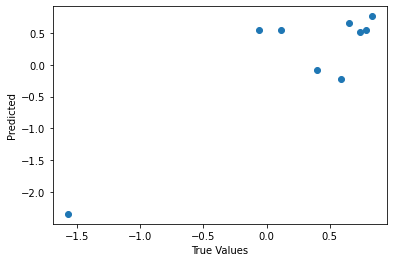

In [23]:
#model_raw
model = XGBRegressor(n_estimators=100, max_depth=4, booster='gbtree')
model.fit(train_input, train_target
         )

# plot
predicted = model.predict(test_input)

fig, ax = plt.subplots()
ax.scatter(test_target, predicted)

ax.set_xlabel('True Values')
ax.set_ylabel('Predicted')
# _ = ax.plot([0, predicted.max()], [0, predicted.max()], ls='-', color='red')

# Optimization and tuning

In [4]:
## Hyper Parameter Optimization

booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]
objective = ['reg:squarederror']


subsample = [0.5, 0.7]
colsample_bytree= [0.5, 0.7]
n_estimators = [100, 500, 900, 1100, 1500]

learning_rate=[0.05,0.01,0.05, 0.08,0.095, 0.1,0.15,0.20]
max_depth = [2, 3, 5, 10, 15 ]
min_child_weight=[1,2,3,4,6,8,10]

In [5]:
# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }


hyperparameter_grid2={
    
}

param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
    }

In [6]:
# Set up the random search with 4-fold cross validation
import xgboost
xgb_model1 =xgboost.XGBRegressor()

xgb_model2 = XGBRegressor()

random_cv = RandomizedSearchCV(estimator=xgb_model1,
                                param_distributions=hyperparameter_grid,
                                cv=5, 
                                n_iter=50,
                                scoring = 'neg_mean_absolute_error',
                                n_jobs = -1,
                                verbose = 5, 
                                return_train_score = True,
                                random_state=42)


gsearch = GridSearchCV(estimator = xgb_model2,
                        param_grid = param_tuning,                        
                        #scoring = 'neg_mean_absolute_error', #MAE
                        #scoring = 'neg_mean_squared_error',  #MSE
                        cv = 5,
                        n_jobs = -1,
                        verbose = 1)



In [11]:
    xgb_model = XGBRegressor()
    xgb_model.fit(train_input, train_target, early_stopping_rounds=10, eval_set=[(test_input, test_target)], verbose=False)



XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [12]:
    gsearch.fit(train_input, train_target,
                eval_set=[(test_input, test_target)],
               early_stopping_rounds=10
               )

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   40.9s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   57.1s
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  1.5min


[0]	validation_0-rmse:86.06839
[1]	validation_0-rmse:78.33339
[2]	validation_0-rmse:71.38357
[3]	validation_0-rmse:65.56506
[4]	validation_0-rmse:60.01441
[5]	validation_0-rmse:55.15344
[6]	validation_0-rmse:50.42661
[7]	validation_0-rmse:46.22002
[8]	validation_0-rmse:42.36617
[9]	validation_0-rmse:39.01285
[10]	validation_0-rmse:35.82041
[11]	validation_0-rmse:32.78862
[12]	validation_0-rmse:30.02793
[13]	validation_0-rmse:27.53127
[14]	validation_0-rmse:25.26125
[15]	validation_0-rmse:23.33914
[16]	validation_0-rmse:21.68957
[17]	validation_0-rmse:20.11209
[18]	validation_0-rmse:18.57141
[19]	validation_0-rmse:17.21555
[20]	validation_0-rmse:16.07111
[21]	validation_0-rmse:14.96123
[22]	validation_0-rmse:13.82473
[23]	validation_0-rmse:12.91611
[24]	validation_0-rmse:11.98235
[25]	validation_0-rmse:11.33318
[26]	validation_0-rmse:10.71761
[27]	validation_0-rmse:9.99895
[28]	validation_0-rmse:9.34080
[29]	validation_0-rmse:8.67877
[30]	validation_0-rmse:8.35449
[31]	validation_0-rmse

[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  1.6min finished


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=...
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parame

In [13]:
# Best params
gsearch.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 3,
 'n_estimators': 100,
 'objective': 'reg:squarederror',
 'subsample': 0.5}

In [28]:
random_cv.fit(train_input, train_target,
                eval_set=[(test_input, test_target)],
               early_stopping_rounds=10
               )

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 227 out of 250 | elapsed:    6.5s remaining:    0.6s


[09:30:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth", "min_child_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-rmse:0.70979
[1]	validation_0-rmse:0.70432
[2]	validation_0-rmse:0.69893
[3]	validation_0-rmse:0.69363
[4]	validation_0-rmse:0.68843
[5]	validation_0-rmse:0.68331
[6]	validation_0-rmse:0.67828
[7]	validation_0-rmse:0.67334
[8]	validation_0-rmse:0.66849
[9]	validation_0-rmse:0.66372
[10]	validation_0-rmse:0.65904
[11]	validation_0-rmse:0.65444
[12]	validation_0-rmse:0.64992
[13]	validation_0-rmse:0.64549
[14]	validation_0-rmse:0.64114
[15]	validation_0-rmse:0.63687
[16]	validation_0-rmse:0.63267
[17]	validation_0-rmse:0.62856
[18]	validation_0-rmse:0.62452
[19]	validat

[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    7.2s finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          verbosity=None),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
              

In [29]:
# Best params
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gblinear', colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=-1, importance_type='gain', interaction_constraints=None,
             learning_rate=0.01, max_delta_step=None, max_depth=10,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=12, num_parallel_tree=None,
             random_state=0, reg_alpha=0, reg_lambda=0, scale_pos_weight=1,
             subsample=None, tree_method=None, validate_parameters=1,
             verbosity=None)

In [ ]:
#Run only in the first run of the kernel.
hyperParameterTuning(train_input, train_target)

In [ ]:
Best Params
{'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 500, 'subsample': 0.5}


{'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 500, 'subsample': 0.7}

# Best Fit

In [ ]:
model_Test = XGBRegressor(booster='gbtree',                      
                          colsample_bytree= 0.5,
                          learning_rate= 0.1,
                          max_depth= 3,
                          min_child_weight= 5,
                          n_estimators= 200,
                          objective= 'reg:squarederror',
                          subsample= 0.7
               
                        )
model_Test.fit(train_input, train_target,
              early_stopping_rounds=10, eval_set=[(test_input, test_target)], verbose=False
              )




In [30]:
model_Test2= XGBRegressor(base_score=0.25, booster='gblinear', colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=-1, importance_type='gain', interaction_constraints=None,
             learning_rate=0.01, max_delta_step=None, max_depth=10,
             min_child_weight=2, monotone_constraints=None,
             n_estimators=100, n_jobs=12, num_parallel_tree=None,
             random_state=0, reg_alpha=0, reg_lambda=0, scale_pos_weight=1,
             subsample=None, tree_method=None, validate_parameters=1,
             verbosity=None)

model_Test2.fit(train_input, train_target,
              early_stopping_rounds=10, eval_set=[(test_input, test_target)], verbose=False
              )

[09:34:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_depth", "min_child_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.25, booster='gblinear', colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=-1, importance_type='gain', interaction_constraints=None,
             learning_rate=0.01, max_delta_step=None, max_depth=10,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=12, num_parallel_tree=None,
             random_state=0, reg_alpha=0, reg_lambda=0, scale_pos_weight=1,
             subsample=None, tree_method=None, validate_parameters=1,
             verbosity=None)

## Plot results

Text(0, 0.5, 'Predicted')

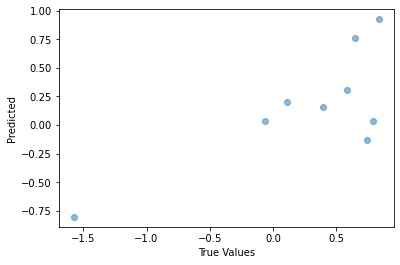

In [31]:
predicted = model_Test2.predict(test_input)

fig, ax = plt.subplots()
ax.scatter(test_target, predicted, alpha=0.5)

ax.set_xlabel('True Values')
ax.set_ylabel('Predicted')

In [32]:
print("r2 score: {}".format(metrics.r2_score(test_target, predicted)))
print("mse: {}".format(metrics.mean_squared_error(test_target, predicted)))
print("rmse: {}".format(np.sqrt(metrics.mean_squared_error(test_target, predicted))))
print("mae: {}".format(metrics.mean_absolute_error(test_target, predicted)))

r2 score: 0.547688581027626
mse: 0.23118578659731043
rmse: 0.4808178309893576
mae: 0.36621840224056224


# PREDICT DIFF WELL

In [ ]:
# Feat_extracts well3

xlsx_2 = pd.ExcelFile('Feat_extracts well4.xlsx')
df_2 = pd.read_excel(xlsx_2, 'PCAs')
dataset_pca_2= df_2.copy()


dataset_pca_2.pop('PC3')
dataset_pca_2.pop('index')

dataset_pca_2